# author: Shouvit Pradhan
## github: @shaw8wit
### references: www.kaggle.com

## Imports

In [1]:
import numpy as np
import scipy 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_12ce9293f99b4840acce86ef1861594b = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='TBySa8i5HKCP3YgTrAZO6HZlWX9WdEwNCu695b00pbZm',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_12ce9293f99b4840acce86ef1861594b.get_object(Bucket='predictinglifeexpectancy-donotdelete-pr-se9auqjboafaaz',Key='Life Expectancy Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## Data Preprocessing

In [3]:
data.info()
# we have several columns empty

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

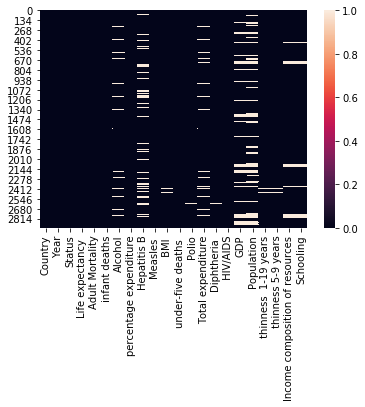

In [4]:
# heatmap for null values
sns.heatmap(pd.isnull(data));

In [5]:
# call this function at any moment to see the null values at that time
def n():
    a=list(data.columns)
    b=[]
    for i in a:
        c=data[i].isnull().sum()
        b.append(c)
    null_df=pd.DataFrame({'Feature name':a,'no. of Nan':b})
    return null_df

In [6]:
# filling continuous valued column's null value by the mean value of the column
data['Life expectancy '].fillna(value=data['Life expectancy '].mean(), inplace=True)
data['Adult Mortality'].fillna(value=data['Adult Mortality'].mean(), inplace=True)

In [7]:
# see the correlation between different columns
corr_data=data.corr()
corr_data

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.169623,-0.078861,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,-0.042937,0.094158,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400
Life expectancy,0.169623,1.000000,-0.696359,-0.196535,0.404029,0.381791,0.255760,-0.157574,0.564466,-0.222503,0.464531,0.216373,0.478465,-0.556457,0.461393,-0.021548,-0.476561,-0.470977,0.724631,0.748263
Adult Mortality,-0.078861,-0.696359,1.000000,0.078747,-0.195454,-0.242814,-0.161828,0.031174,-0.384806,0.094135,-0.274218,-0.114355,-0.274540,0.523727,-0.296019,-0.013639,0.302501,0.308053,-0.457530,-0.452380
infant deaths,-0.037415,-0.196535,0.078747,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720
Alcohol,-0.052990,0.404029,-0.195454,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378
percentage expenditure,0.031400,0.381791,-0.242814,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687
Hepatitis B,0.104333,0.255760,-0.161828,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117
Measles,-0.082493,-0.157574,0.031174,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225
BMI,0.108974,0.564466,-0.384806,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961
under-five deaths,-0.042937,-0.222503,0.094135,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.112081,0.544423,0.467789,0.472263,-0.163305,-0.209373


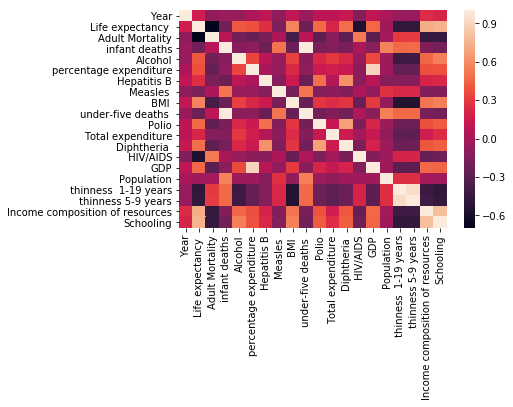

In [8]:
# heatmap of correlation values darkest and lightest colours have highest correlation
sns.heatmap(corr_data);

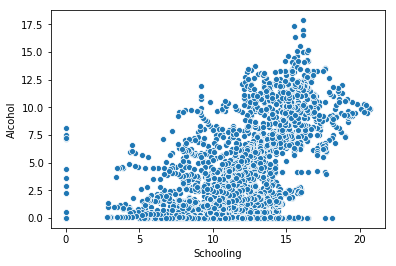

In [9]:
sns.scatterplot(x=data['Schooling'],y=data['Alcohol']);

In [10]:
def impute_Alcohol(cols):
    al=cols[0]
    sc=cols[1]
    if pd.isnull(al):
        if sc<=2.5:
            return 4.0
        elif 2.5<sc<=5.0:
            return 1.5
        elif 5.0<sc<=7.5:
            return 2.5
        elif 7.5<sc<=10.0:
            return 3.0
        elif 10.0<sc<=15:
            return 4.0
        elif sc>15:
            return 10.0
    else:
        return al
    
data['Alcohol']=data[['Alcohol','Schooling']].apply(impute_Alcohol,axis=1)

In [11]:
# since some values of schooling is also null
data['Alcohol'].fillna(value=data['Alcohol'].mean(), inplace=True)

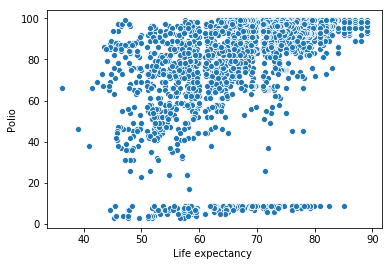

In [12]:
sns.scatterplot(x=data['Life expectancy '],y=data['Polio']);

In [13]:
def impute_polio(c):
    p=c[0]
    l=c[1]
    if pd.isnull(p):
        if l<=45:
            return 80.0
        elif 45<l<=50:
            return 67.0
        elif 50<l<=60:
            return 87.44
        elif 60<l<=70:
            return 91
        elif 70<l<=80:
            return 94.3
        elif l>80:
            return 95
    else:
        return p
    
data['Polio']=data[['Polio','Life expectancy ']].apply(impute_polio,axis=1)

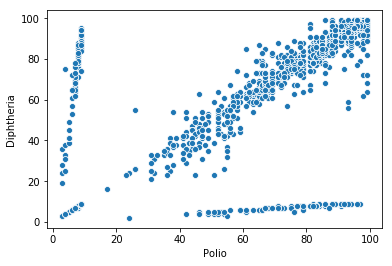

In [14]:
sns.scatterplot(x=data['Polio'],y=data['Diphtheria ']);

In [15]:
def impute_Diptheria(c):
    d=c[0]
    p=c[1]
    if pd.isnull(d):
        if p<=10:
            return 75.0
        elif 10<p<=40:
            return 37.0
        elif 40<p<=45:
            return 40.0
        elif 45<p<=50:
            return 50.0
        elif 50<p<=60:
            return 55.0
        elif 60<p<=80:
            return 65.0
        elif p>80:
            return 90.0
    else:
        return d
data['Diphtheria ']=data[['Diphtheria ','Polio']].apply(impute_Diptheria,axis=1)

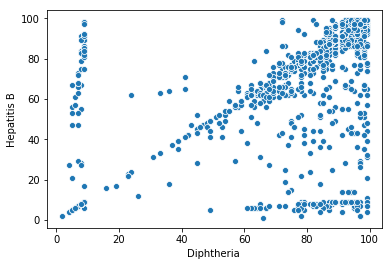

In [16]:
sns.scatterplot(x=data['Diphtheria '],y=data['Hepatitis B']);

In [17]:
def impute_HepatatisB(cols):
    hep=cols[0]
    dip=cols[1]
    if pd.isnull(hep):
        if dip<=15:
            return 75.0
        elif 15<dip<=30:
            return 20.0
        elif 30<dip<=45:
            return 38.0
        elif 45<dip<=60:
            return 43.0
        elif 60<dip<=80:
            return 63.0
        elif dip>80:
            return 88.4
    else:
        return hep
    
data['Hepatitis B']=data[['Hepatitis B','Diphtheria ']].apply(impute_HepatatisB,axis=1)

In [18]:
# sample method to find corresponding values of Hepatitis according to Diptheria
data[data['Diphtheria ']>80.0]['Hepatitis B'].mean()

88.39573481687472

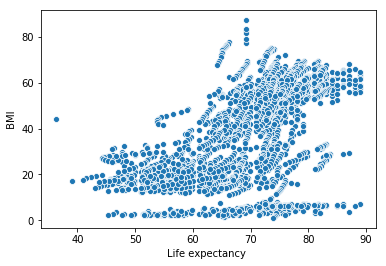

In [19]:
sns.scatterplot(x=data['Life expectancy '],y=data[' BMI ']);

In [20]:
def impute_BMI(c):
    b=c[0]
    l=c[1]
    if pd.isnull(b):
        if l<=50:
            return 25.0
        elif 50<l<=60:
            return 25.0
        elif 60<l<=70:
            return 32.0
        elif 70<l<=80:
            return 46.8
        elif 80<l<=100:
            return 60.0
    else:
        return b
    
data[' BMI ']=data[[' BMI ','Life expectancy ']].apply(impute_BMI,axis=1)

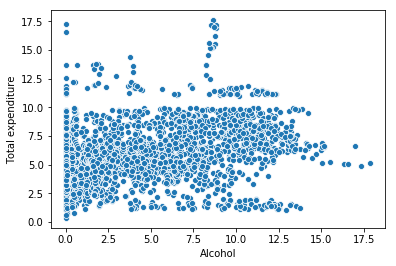

In [21]:
sns.scatterplot(y=data['Total expenditure'],x=data['Alcohol']);

In [22]:
def impute_Total_exp(c):
    t=c[0]
    a=c[1]
    if pd.isnull(t):
        if a<=2.5:
            return 5.08
        elif 2.5<a<=5.0:
            return 6.0
        elif 5.0<a<=10.0:
            return 6.71
        elif 10.0<a<=12.5:
            return 6.9
        elif a>12.5:
            return 6.68
    else:
        return t
    
data['Total expenditure']=data[['Total expenditure','Alcohol']].apply(impute_Total_exp,axis=1)

In [23]:
# calls functions n() anytime to view the status of null values in data frame
print(n())

                       Feature name  no. of Nan
0                           Country           0
1                              Year           0
2                            Status           0
3                  Life expectancy            0
4                   Adult Mortality           0
5                     infant deaths           0
6                           Alcohol           0
7            percentage expenditure           0
8                       Hepatitis B           0
9                          Measles            0
10                             BMI            0
11               under-five deaths            0
12                            Polio           0
13                Total expenditure           0
14                      Diphtheria            0
15                         HIV/AIDS           0
16                              GDP         448
17                       Population         652
18             thinness  1-19 years          34
19               thinness 5-9 years     

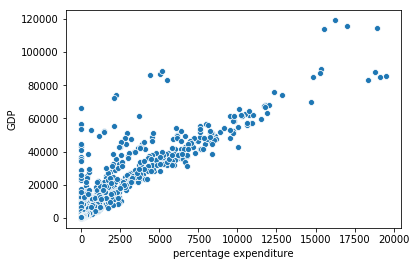

In [24]:
sns.scatterplot(x=data['percentage expenditure'],y=data['GDP']);

In [25]:
def impute_GDP(c):
    g=c[0]
    p=c[1]
    if pd.isnull(g):
        if p<=1250:
            return 1100.0
        elif 1250<p<=2500:
            return 1800.0
        elif 2500<p<=3750:
            return 2900.0
        elif 3750<p<=7500:
            return 3500.0
        elif 7500<p<=8750:
            return 4500.0
        elif 8750<p<=10000:
            return 5000.0
        elif 10000<p<=11250:
            return 5700.0
        elif 11250<p<=12500:
            return 7000.0
        elif 12500<p<=15000:
            return 8000.0
        elif 15000<p<=17500:
            return 9000.0
        elif p>17500:
            return 8500.0
    else:
        return g
    
data['GDP']=data[['GDP','percentage expenditure']].apply(impute_GDP,axis=1)

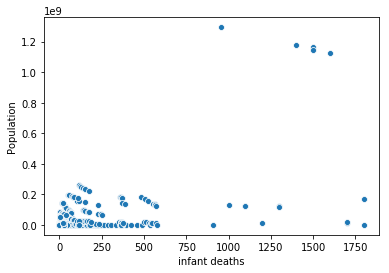

In [26]:
sns.scatterplot(x=data['infant deaths'],y=data['Population']);

In [27]:
def impute_population(c):
    p=c[0]
    i=c[1]
    if pd.isnull(p):
        if i<=100:
            return 0.19*((10)**9)
        elif 100<i<=250:
            return 0.18*((10)**9)
        elif 250<i<=350:
            return 0.02*((10)**9)
        elif 350<i<=900:
            return 0.1*((10)**9)
        elif 900<i<=1100:
            return 0.18*((10)**9)
        elif 1100<i<=1250:
            return 0.05*((10)**9)
        elif 1250<i<=1500:
            return 0.19*((10)**9)
        elif 1500<i<=1750:
            return 0.05*((10)**9)
        elif i>1750:
            return 0.1*((10)**9)
    else:
        return p
    
data['Population']=data[['Population','infant deaths']].apply(impute_population,axis=1)

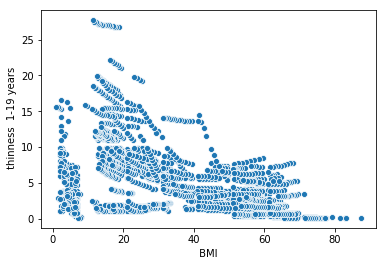

In [28]:
sns.scatterplot(x=data[' BMI '],y=data[' thinness  1-19 years']);

In [29]:
def impute_Thin_1(c):
    t=c[0]
    b=c[1]
    if pd.isnull(t):
        if b<=10:
            return 5.0
        elif 10<b<=20:
            return 10.0
        elif 20<b<=30:
            return 8.0
        elif 30<b<=40:
            return 6.0
        elif 40<b<=50:
            return 3.0
        elif 50<b<=70:
            return 4.0
        elif b>70:
            return 1.0
    else:
        return t
    
data[' thinness  1-19 years']=data[[' thinness  1-19 years',' BMI ']].apply(impute_Thin_1,axis=1)

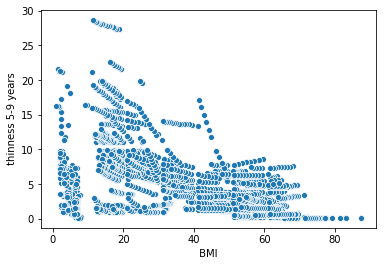

In [30]:
sns.scatterplot(x=data[' BMI '],y=data[' thinness 5-9 years']);

In [31]:
data[' thinness 5-9 years']=data[[' thinness 5-9 years',' BMI ']].apply(impute_Thin_1,axis=1)

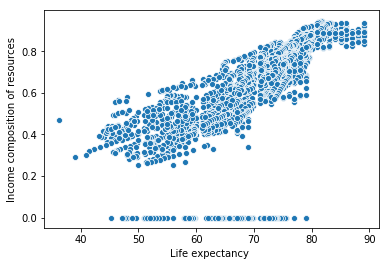

In [32]:
sns.scatterplot(x=data['Life expectancy '],y=data['Income composition of resources']);

In [33]:
def impute_Income(c):
    i=c[0]
    l=c[1]
    if pd.isnull(i):
        if l<=40:
            return 0.4
        elif 40<l<=50:
            return 0.42
        elif 50<l<=60:
            return 0.402
        elif 60<l<=70:
            return 0.54
        elif 70<l<=80:
            return 0.71
        elif l>80:
            return 0.88
    else:
        return i
        
data['Income composition of resources']=data[['Income composition of resources','Life expectancy ']].apply(impute_Income,axis=1)

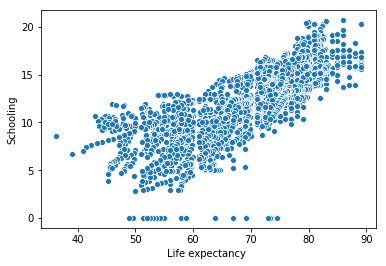

In [34]:
sns.scatterplot(x=data['Life expectancy '],y=data['Schooling']);

In [35]:
def impute_schooling(c):
    s=c[0]
    l=c[1]
    if pd.isnull(s):
        if l<= 40:
            return 8.0
        elif 40<l<=44:
            return 7.5
        elif 44<l<50:
            return 8.1
        elif 50<l<=60:
            return 8.2
        elif 60<l<=70:
            return 10.5
        elif 70<l<=80:
            return 13.4
        elif l>80:
            return 16.5
    else:
        return s
    
data['Schooling']=data[['Schooling','Life expectancy ']].apply(impute_schooling,axis=1)

In [36]:
# sample to find schooling values of corresponding life expectancy
data[(data['Life expectancy ']>44) & (data['Life expectancy ']<=50)]['Schooling'].mean()

8.102564102564102

In [37]:
y=data['Life expectancy ']

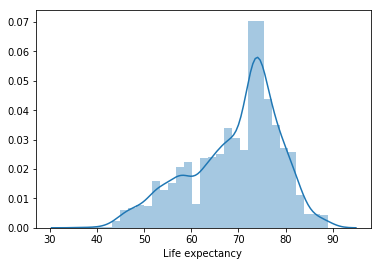

In [38]:
# we see that max expectancy in the dataset is between 70-80
sns.distplot(y);

In [39]:
# dataframe without output
X=data.drop('Life expectancy ',axis=1)
X.describe()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,164.796448,30.303948,4.627774,738.251295,79.373928,2419.592240,38.198060,42.035739,82.581906,5.944149,82.356705,1.742103,6509.824571,5.201981e+07,4.867427,4.897686,0.624758,11.947992
std,4.613841,124.080302,117.926501,3.971570,1987.914858,24.488486,11467.272489,19.963537,160.445548,23.363600,2.403525,23.651584,5.077785,13335.774581,9.112931e+07,4.403242,4.491058,0.208649,3.335364
min,2000.000000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,74.000000,0.000000,1.092500,4.685343,74.000000,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.488250,10.000000
50%,2008.000000,144.000000,3.000000,4.000000,64.912906,88.400000,17.000000,43.000000,4.000000,93.000000,5.905000,93.000000,0.100000,1171.983435,3.675929e+06,3.400000,3.400000,0.675500,12.300000
75%,2012.000000,227.000000,22.000000,7.627500,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,4779.405190,6.610275e+07,7.200000,7.300000,0.774750,14.200000
max,2015.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [40]:
X['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

In [41]:
X['Country'].nunique()

193

In [42]:
X['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [43]:
# converting categorical values to indicator values
Country_dummy=pd.get_dummies(X['Country'])
status_dummy=pd.get_dummies(X['Status'])

In [44]:
X.drop(['Country','Status'],inplace=True,axis=1)
X=pd.concat([X,Country_dummy,status_dummy],axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Columns: 214 entries, Year to Developing
dtypes: float64(15), int64(4), uint8(195)
memory usage: 995.7 KB


In [45]:
# final dataframe
X.head()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe,Developed,Developing
0,2015,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,...,0,0,0,0,0,0,0,0,0,1
1,2014,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,...,0,0,0,0,0,0,0,0,0,1
2,2013,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,...,0,0,0,0,0,0,0,0,0,1
3,2012,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,...,0,0,0,0,0,0,0,0,0,1
4,2011,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,...,0,0,0,0,0,0,0,0,0,1


## Training the models

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
Linear_model= LinearRegression()

In [50]:
Linear_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [51]:
predictions1=Linear_model.predict(X_test)

In [52]:
from sklearn.metrics import mean_squared_error

In [53]:
# root mean squared error
print(mean_squared_error(y_test,predictions1)**(0.5))

1.8839499864220532


In [54]:
from sklearn.metrics import r2_score

In [55]:
# accuracy
r2_score(y_test,predictions1)

0.9591320821139895

In [56]:
# an alternate to LinearRegression()
from sklearn.linear_model import Lasso

In [57]:
lasso_model=Lasso(alpha=0.00000001)

In [58]:
lasso_model.fit(X_train,y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=1e-08, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [59]:
predictions3=lasso_model.predict(X_test)

In [60]:
# root mean squared error
print(mean_squared_error(y_test,predictions3)**(0.5))

1.8658025713535114


In [61]:
# accuracy
r2_score(y_test, predictions3)

0.9599156220847623

#### Since the current model uses all the columns to train and predict, it becomes a bit difficult for the node-red integration as the countries are 193 in number and the user would need to fill all the rest of the 20+ column's information which would be really tedious. Therefore, few of the colums have been dropped which had low correlation to the Life Expectancy and to make the input from the user as small as possible. Doing this definitely reduced the accuracy, but being a regression model the output can be shown as a range to the user which is calculated by the rmse value of the model. This is just a quick fix though. The final model which is deployed only uses 9 columns and predicts the output in a range.

## The deployable model

In [96]:
y=data['Life expectancy ']
x=X[['Adult Mortality', ' BMI ', 'Polio', 'Diphtheria ', ' HIV/AIDS', 'GDP', 
     ' thinness  1-19 years', 'Income composition of resources', 'Schooling', 'Developed', 'Developing']]

In [97]:
x.describe(include="all")

,Adult Mortality,BMI,Polio,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,Income composition of resources,Schooling,Developed,Developing
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000
mean,164.796448,38.198060,82.581906,82.356705,1.742103,6509.824571,4.867427,0.624758,11.947992,0.174268,0.825732
std,124.080302,19.963537,23.363600,23.651584,5.077785,13335.774581,4.403242,0.208649,3.335364,0.379405,0.379405
min,1.000000,1.000000,3.000000,2.000000,0.100000,1.681350,0.100000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,19.400000,78.000000,78.000000,0.100000,580.486996,1.600000,0.488250,10.000000,0.000000,1.000000
50%,144.000000,43.000000,93.000000,93.000000,0.100000,1171.983435,3.400000,0.675500,12.300000,0.000000,1.000000
75%,227.000000,56.100000,97.000000,97.000000,0.800000,4779.405190,7.200000,0.774750,14.200000,0.000000,1.000000
max,723.000000,87.300000,99.000000,99.000000,50.600000,119172.741800,27.700000,0.948000,20.700000,1.000000,1.000000


In [98]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=101)

In [99]:
# use any model
test = LinearRegression()
#test = Lasso(alpha=0.00000001)
test.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [100]:
p=test.predict(X_test)

print(mean_squared_error(y_test,p)**(0.5))

r2_score(y_test,p)

3.8355676958374962


0.8306040284932864

## Watson machine learing client integration
### Enter given credentials to node-red flow to use the model online
#### isn't required if you only want to run the model without deployment

In [73]:
!pip install watson-machine-learning-client

In [101]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

In [102]:
credentials = {
  "apikey": "Km_kXLKIgjx1z75iyHuh9xMDL4dgb1AROhWvu7KjkCZg",
  "iam_apikey_description": "Auto-generated for key 3553d08e-e6ae-4440-92b4-353c2a27b26c",
  "iam_apikey_name": "Service credentials-1",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/34be0fd233f242d1b825eaa99881daeb::serviceid:ServiceId-b4afd2df-6730-4cfc-aefa-96d7375612ee",
  "instance_id": "396ebf4c-771e-4603-8628-12e79988fe1b",
  "url": "https://eu-gb.ml.cloud.ibm.com"
}

In [103]:
client = WatsonMachineLearningAPIClient(credentials)

In [104]:
model_props = {
    client.repository.ModelMetaNames.AUTHOR_NAME : "Shouvit Pradhan",
    client.repository.ModelMetaNames.AUTHOR_EMAIL : "shaw7wit@gmail.com",
    client.repository.ModelMetaNames.NAME : "life data"
}

In [105]:
model_artifact = client.repository.store_model(test, meta_props=model_props)

In [106]:
model_artifact['metadata']['guid']

'801d4545-9507-402b-8931-d5dba241115f'

In [107]:
guid = client.repository.get_model_uid(model_artifact)

In [119]:
deploy = client.deployments.create(guid, name="Life Prediction")



#######################################################################################

Synchronous deployment creation for uid: '801d4545-9507-402b-8931-d5dba241115f' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='2a838025-271d-47d9-804f-e7f7a9e20718'
------------------------------------------------------------------------------------------------




In [120]:
scoring_url = client.deployments.get_scoring_url(deploy)

In [121]:
scoring_url

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/396ebf4c-771e-4603-8628-12e79988fe1b/deployments/2a838025-271d-47d9-804f-e7f7a9e20718/online'

In [118]:
client.deployments.list()

----  ----  ----  -----  -------  ---------  -------------
GUID  NAME  TYPE  STATE  CREATED  FRAMEWORK  ARTIFACT TYPE
----  ----  ----  -----  -------  ---------  -------------
